# HR Analytics: Job Change of Data Scientists.

# Context and Content

* A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

* This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

# Extracting data directly from Kaggle to Google Drive and Colab

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "priyankadandale" # username from the json file
os.environ['KAGGLE_KEY'] = "1bb2d68a77eeaff50198bd6bb816daef" # key from the json file

In [ ]:
#Download hr-analytics-job-change-of-data-scientists data from Kaggle API
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 44.0MB/s]


In [ ]:
!unzip -q "/content/hr-analytics-job-change-of-data-scientists.zip"

# Data Understanding

In [ ]:
import pandas as pd

df = pd.read_csv("/content/aug_train.csv")
df.shape

(19158, 14)

In [ ]:
df.head()

enrollee_id      city  ...  training_hours target
0         8949  city_103  ...              36    1.0
1        29725   city_40  ...              47    0.0
2        11561   city_21  ...              83    0.0
3        33241  city_115  ...              52    1.0
4          666  city_162  ...               8    0.0

[5 rows x 14 columns]

In [ ]:
df.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## What are the columns?

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Features Description

* enrollee_id : Unique ID for enrollee

* city : City code

* city_development_index : Developement index of the city (scaled)

* gender : Registered person gender (M/F)

* relevent_experience : Relevent experience

* enrolled_university : Type of university of the enrolee

* education_level : edu level

* major_discipline : edu discipline of enrollee

* experience : Total experience in years

* company_size : No of employees in current employer's company

* company_type : Type of current employer

* last_new_job : Difference in years between previous job and current job

* training_hours : training hours completed

* target : 0 – Not looking for job change, 1 – Looking for a job change

## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data Correction

* In the dataset, there is some Human error in column company size i.e. Oct-49 and in pandas it was printed as 10/49, so we need to convert into np.nan(NaN).

In [ ]:
import numpy as np
df['company_size'] = df['company_size'].replace('10/49', np.nan)
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

# Basic EDA

# Replacing Target values by string

In [ ]:
import seaborn as sns

df["target"].replace({0.0: "Not looking for job change", 1.0: "Looking for a job change"}, inplace=True)
print(df["target"].value_counts(),'\n')

import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = False)
import seaborn as sns

Not looking for job change    14381
Looking for a job change       4777
Name: target, dtype: int64 



In [ ]:
target = df.groupby('target').agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.pie(target, values = 'count', names = 'target')
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.5, 
                  marker = dict(colors = ['red','green'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Job search', title_x = 0.5, title_y = 0.53, title_font_size = 32, 
                  title_font_family = 'Calibri Black', title_font_color = 'black',
                  showlegend = False)
                  
fig.show(renderer="colab")

## How many missing values present? What is the percentage of missing values?


In [ ]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(df)

Count Missing  Percent Missing
enrollee_id                         0         0.000000
city                                0         0.000000
city_development_index              0         0.000000
gender                           4508        23.530640
relevent_experience                 0         0.000000
enrolled_university               386         2.014824
education_level                   460         2.401086
major_discipline                 2813        14.683161
experience                         65         0.339284
company_size                     7409        38.673139
company_type                     6140        32.049274
last_new_job                      423         2.207955
training_hours                      0         0.000000
target                              0         0.000000

In [ ]:
df_cols= count_percent(df)
df_cols[df_cols['Count Missing']>0].index

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

* Above 8 features have missing values.

## Visualize missing values in dataset

(19158, 14)


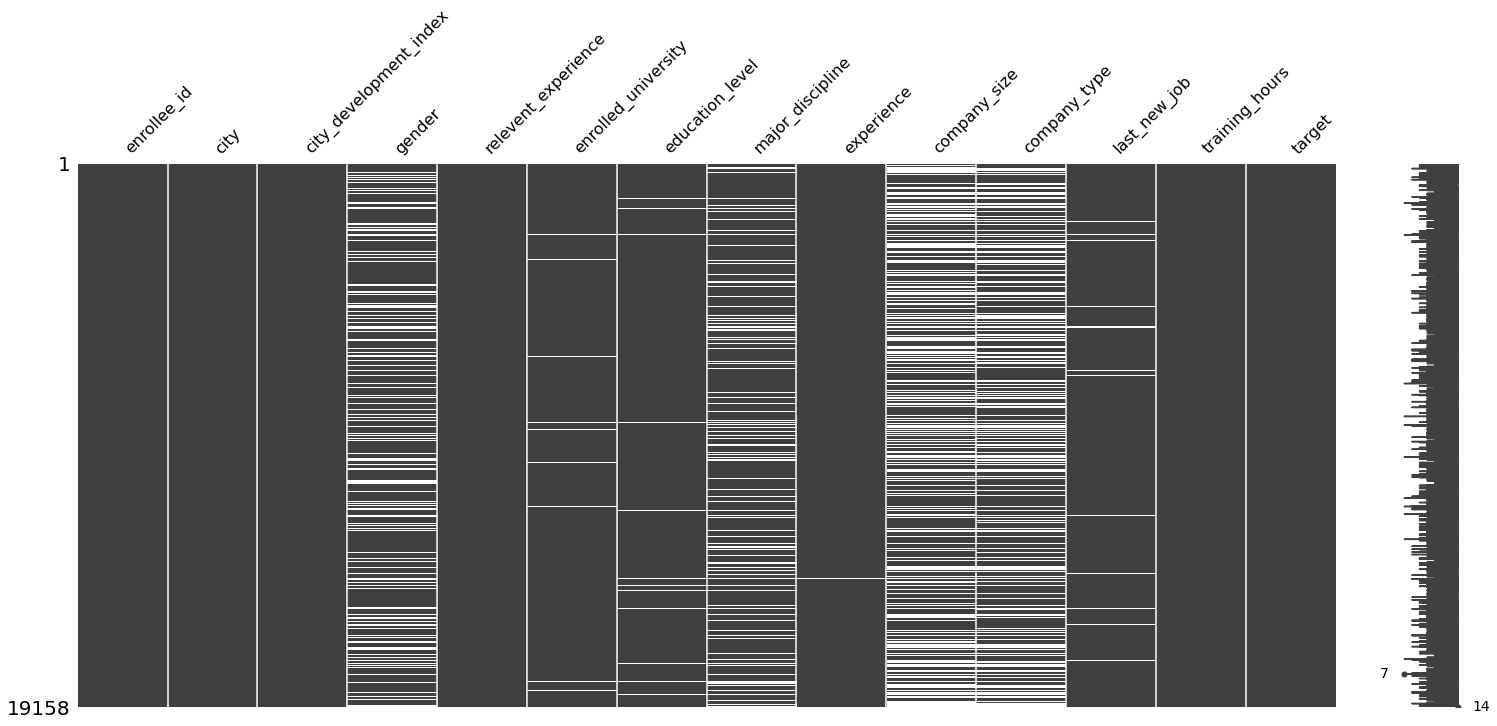

In [ ]:
import missingno as msno
print(df.shape)
msno.matrix(df);

* Using this matrix you can very quickly find the pattern of missingness in the dataset. In our case, the columns company_size and company_type have more or less similar pattern of missing values while gender and major_discipline shows a different pattern.

## Visualize the number of values available as a bar chart


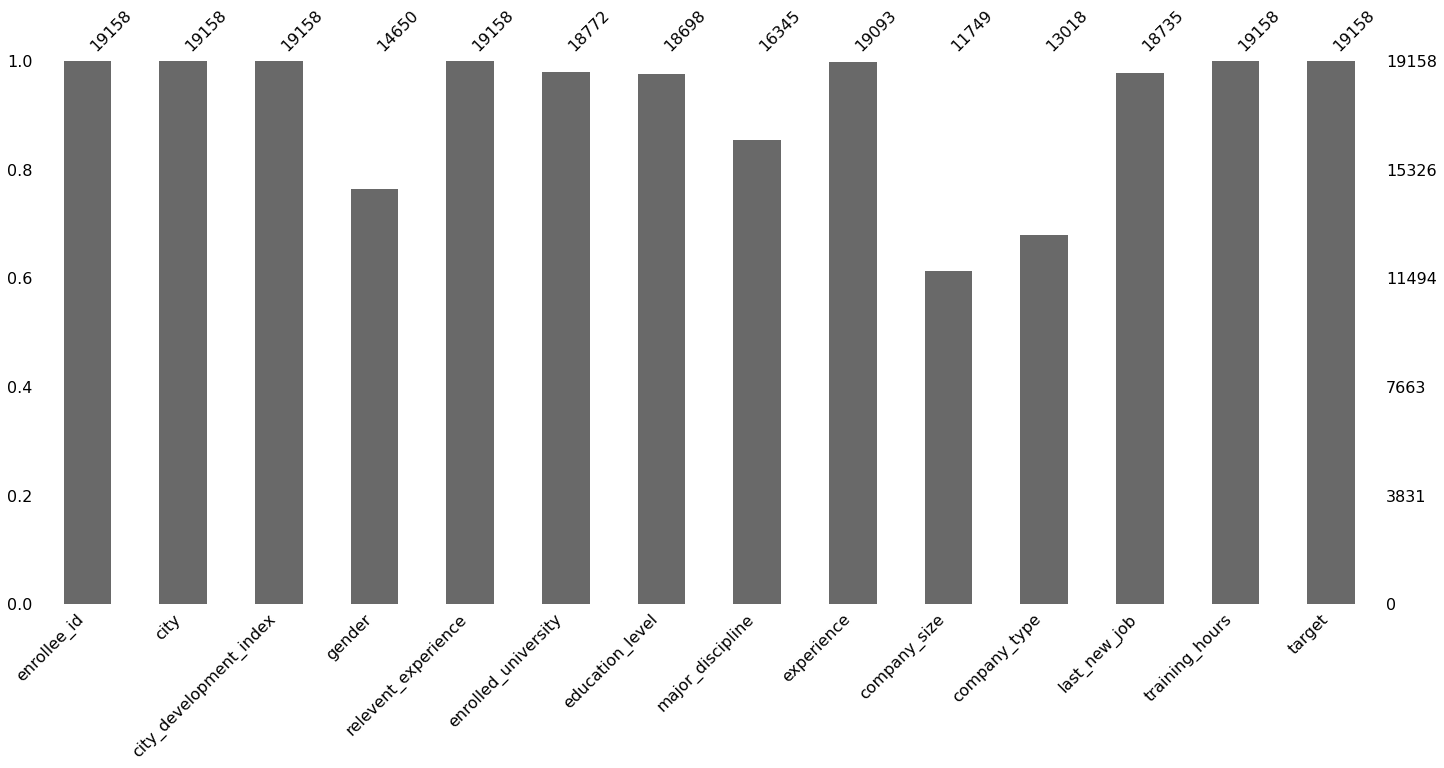

In [ ]:
msno.bar(df);

* This bar chart gives you an idea about how many values are available there in each column. In our case, company_size and company_type contain the most number of missing values followed by gender and major_discipline.

## Visualize the correlation between the number of missing values in different columns as a heatmap

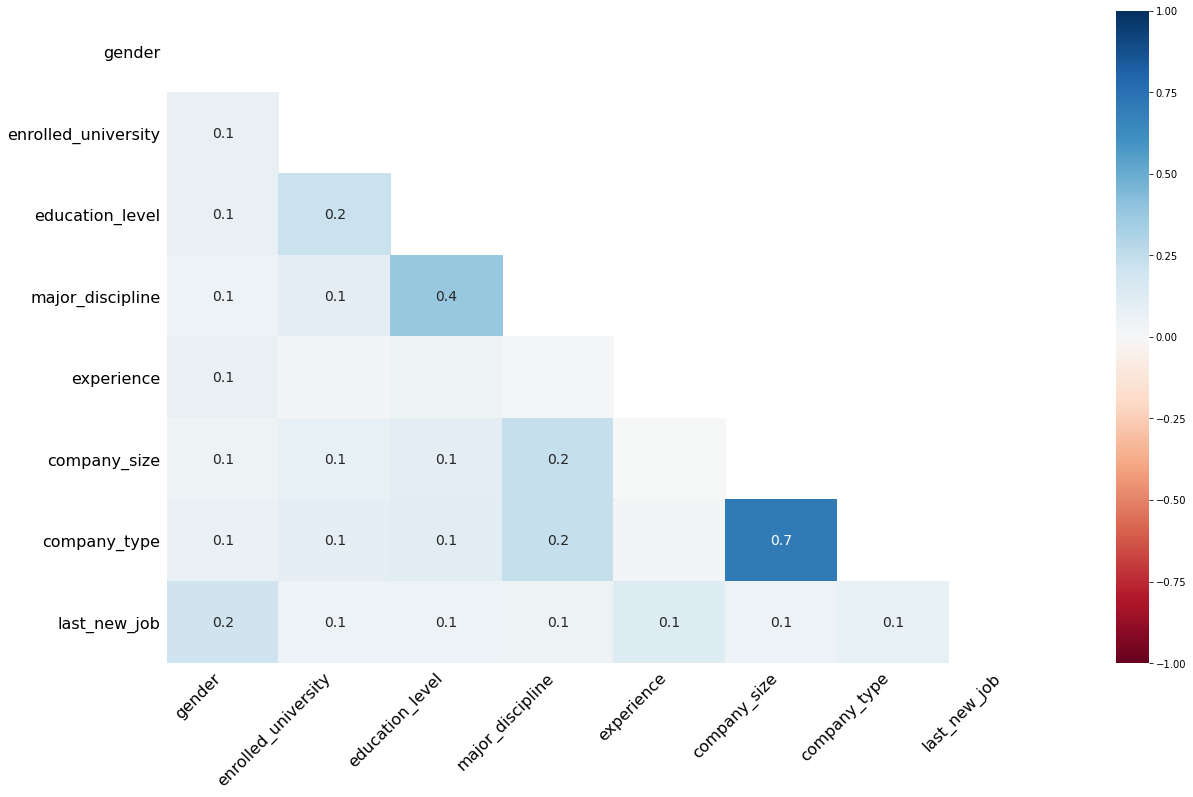

In [ ]:
msno.heatmap(df);

* Heatmap shows the correlation of missingness between every 2 columns. In our case, the correlation between company_size and company_type is 0.7 which means if one of them is present then the other one must be present highly probably.

## Which are the frequent city codes?

In [ ]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

## Which are the top 10 city codes?

In [ ]:
df_city = pd.DataFrame(df['city'].value_counts())
city_col = df_city['city'][:10]
city_index = df_city.index[:10]

#city
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.bar(city_index, city_col, color="orange")
plt.ylabel("Frequency")
plt.show()

## What is the maximum city development index?

In [ ]:
df['city_development_index'].value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

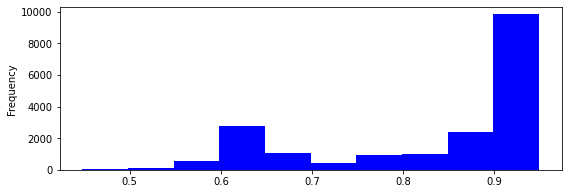

In [ ]:
#city_development_index
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.hist(df["city_development_index"], color="blue")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'city_development_index', data = df)

plt.subplot(1,2,2)
sns.distplot(df[df['target'] == "Looking for a job change"]['city_development_index'][0:] , label = "Looking for job change", color = 'Orange')
sns.distplot(df[df['target'] == "Not looking for job change"]['city_development_index'][0:] , label = "Not looking for job change" , color = 'blue' )
plt.legend()
plt.show();

* City development index seem to be a significant feature in distinguishing target variable.

## Function to return value counts for the feature

In [ ]:
def valuecounts(column):
  valcount = column.value_counts()
  distribution = column.value_counts(normalize=True)*100

  distribution_df = pd.DataFrame({'Count':valcount,
                              'Percent': round(distribution,2)})
  return print(distribution_df,'\n')

## Gender Analysis by Target

* Note that around 23% of data is missing in gender feature.

        Count  Percent
Male    13221    90.25
Female   1238     8.45
Other     191     1.30 



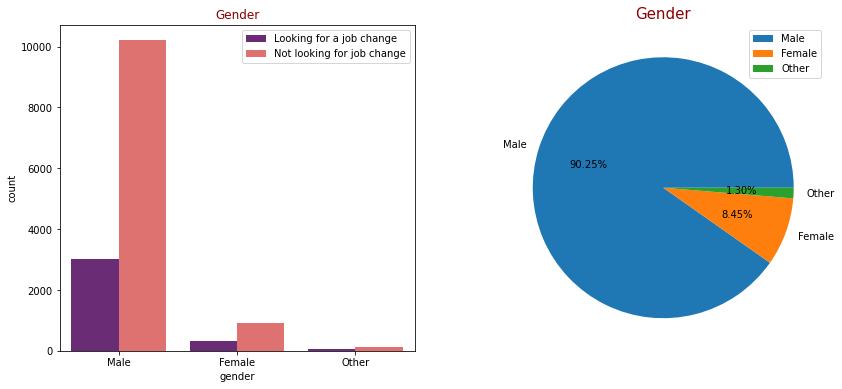

In [ ]:
#gender 
import seaborn as sns
gender = df["gender"].value_counts()

valuecounts(df["gender"])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(df["gender"], hue = "target", data = df,palette="magma")
plt.title("Gender", color = "darkred")
plt.legend()

plt.subplot(1,2,2)
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()


* The number of men is higher than the others. 90% of the total strength are men.

## Does relevent experience matters?

In [ ]:
#relevent_experience

experience = df["relevent_experience"].value_counts()

valuecounts(df["relevent_experience"])

experience_index = experience.index
experience_values = experience.values

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
colrs= [ "b", "#4CAF50"]
plt.pie(experience_values, labels=experience_index, autopct='%1.2f%%',colors=colrs)
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()

plt.subplot(1,2,2)
ax= sns.countplot(df["relevent_experience"], hue = "target", data = df,palette="magma")
plt.xlabel('Relevent Experience', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Relevent Experience', color = "darkred")
plt.legend()
plt.show()


                         Count  Percent
Has relevent experience  13792    71.99
No relevent experience    5366    28.01 



* There are more than 70% people with relevant experience.

## Does type of university of enrolee's education matters?

                  Count  Percent
no_enrollment     13817    73.60
Full time course   3757    20.01
Part time course   1198     6.38 



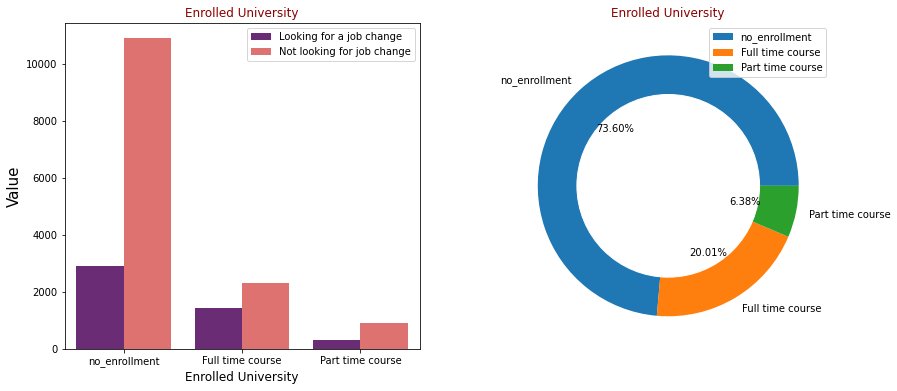

In [ ]:
#enrolled_university 

valuecounts(df["enrolled_university"])

university = df["enrolled_university"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.countplot(df["enrolled_university"], hue = "target", data = df,palette="magma")
plt.xlabel('Enrolled University', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.legend()

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(university.values, labels = university.index,  autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Enrolled University", color = "darkred")
plt.legend()
plt.show()


* There are around 73% of people with no university 
enrollment.

## Does education level effects?

In [ ]:
#education_level

valuecounts(df["education_level"])

edu_level = df["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax = sns.countplot(df["education_level"], hue = "target", data = df,palette="magma")
plt.xlabel('Edu Level', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Education Level', color = "darkred")

#add colors
colors = ['#ff9999','#ffcc99','#66b3ff','#99ff99','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Education Level", color = "darkred")
plt.legend()
plt.show()



                Count  Percent
Graduate        11598    62.03
Masters          4361    23.32
High School      2017    10.79
Phd               414     2.21
Primary School    308     1.65 



* The distribution of the education level feature within the data. It consists 60% of graduates.

## Which is the most common major discipline?

                 Count  Percent
STEM             14492    88.66
Humanities         669     4.09
Other              381     2.33
Business Degree    327     2.00
Arts               253     1.55
No Major           223     1.36 



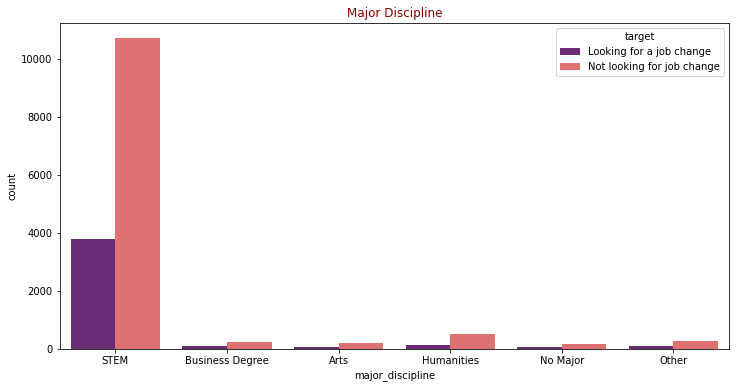

In [ ]:
# major_discipline
mj_discipline = df["major_discipline"].value_counts()

valuecounts(df["major_discipline"])

plt.figure(figsize=(12,6))
sns.countplot(df["major_discipline"],hue = "target", data = df,palette="magma")
plt.title("Major Discipline", color = "darkred")
plt.show()


* The number of STEMs is quite high compared to others. When creating our model, it may override others because it occupies 88% of total major discipline.

## Does years of experience matter?

In [ ]:
df["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

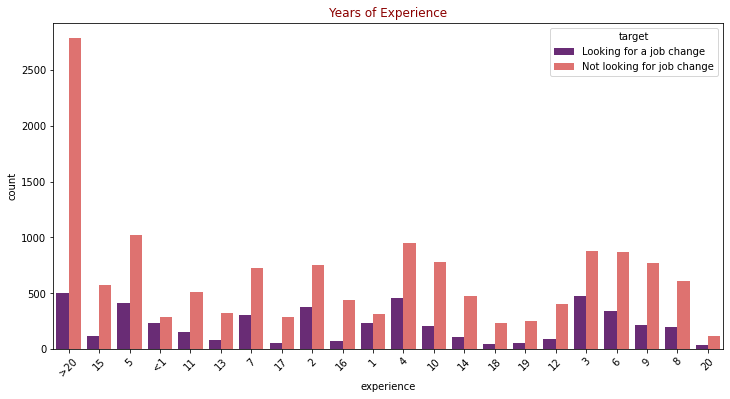

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df["experience"], hue = "target", data = df,palette="magma")
plt.xticks(rotation = 45)
plt.title("Years of Experience", color = "darkred")
plt.show()

* If a person has experience more than 20 years then most probably he/she will not be looking for job change.

## What is the affect of company size on desire of job change?

* Note that around 30% of the data is missing in company size feature.

In [ ]:
df['target'].value_counts()

Not looking for job change    14381
Looking for a job change       4777
Name: target, dtype: int64

In [ ]:
# If below cell gives path error then upgrade your plotly version using below code
#!pip install --upgrade plotly

In [ ]:
#company_size
company_size = df["company_size"].value_counts()

valuecounts(df["company_size"])

cs = df.groupby(['target', 'company_size']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.sunburst(cs,path = ['target', 'company_size'],  values = 'count', color = 'target',
                 color_discrete_map = {'Looking for a job change': 'red', 'Not looking for job change': 'green'},
                 width = 600, height = 600)

fig.update_layout(annotations = [dict(text = 'Affect of company size on the desire to change job', 
                                      x = 0.5, y = 1.1, font_size = 14, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")


           Count  Percent
50-99       3083    26.24
100-500     2571    21.88
10000+      2019    17.18
1000-4999   1328    11.30
<10         1308    11.13
500-999      877     7.46
5000-9999    563     4.79 



## Does company type matters?

In [ ]:
#company_type
company_type = df["company_type"].value_counts()
valuecounts(df["company_type"])


                     Count  Percent
Pvt Ltd               9817    75.41
Funded Startup        1001     7.69
Public Sector          955     7.34
Early Stage Startup    603     4.63
NGO                    521     4.00
Other                  121     0.93 



In [ ]:
cs = df.groupby(['target', 'company_type']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.sunburst(cs,path = ['target', 'company_type'],  values = 'count', color = 'target',
                 color_discrete_map = {'Looking for a job change': 'red', 'Not looking for job change': 'green'},
                 width = 600, height = 600)

fig.update_layout(annotations = [dict(text = 'Affect of company type on the desire to change job', 
                                      x = 0.5, y = 1.1, font_size = 14, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show(renderer="colab")

* 75% of people, the current employer are Pvt. Ltd.

## What is the distribution of years between previous job and current job?

In [ ]:
# last_new_job 
last_new = df["last_new_job"].value_counts()

valuecounts(df["last_new_job"])

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax= sns.countplot(df["last_new_job"], hue = "target", data = df,palette="magma")
plt.xlabel('Last New Job', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Last New Job', color = "darkred")

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ccbbb2','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.3,color = "white")
plt.pie(last_new.values, labels = last_new.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Last New Job", color = "darkred")
plt.legend()
plt.show()

       Count  Percent
1       8040    42.91
>4      3290    17.56
2       2900    15.48
never   2452    13.09
4       1029     5.49
3       1024     5.47 



* Around 40% people are having 1 year of gap between last job and new job.

## What is the effect of training hours?

In [ ]:
df["training_hours"].value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

In [ ]:
#training_hours 
plt.figure(figsize=(9,3))
plt.hist(df["training_hours"],color="green")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'training_hours', data = df)

plt.subplot(1,2,2)
sns.distplot(df[df['target'] == "Looking for a job change"]['training_hours'][0:] , label = "Looking for job change", color = 'Orange')
sns.distplot(df[df['target'] == "Not looking for job change"]['training_hours'][0:] , label = "Not looking for job change" , color = 'blue' )
plt.legend()
plt.show();

* In this case, training hours does not lead to job change according to the graph.

# End of Part-1!